# 数据可视化

In [1]:
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('dark')

In [2]:
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
df1.isna()
df1.isnull()

df1.dropna()
df1.dropna(axis=1)
df1.dropna(how='all')

df1.fillna(0)
df1.fillna(axis=1,method='ffill')
df1.fillna(axis=0,method='ffill')
df1['Height'].fillna(df1.Height.mean())
#df1.replace("Male", 0,inplace=True)
#df1.replace("Female", 1,inplace=True)
df1.rename(columns={'Index':"Level"},inplace=True)

In [3]:
df1.sort_values('Height',ascending=True,inplace=True)
df1.reset_index(inplace=True)
plt.style.use({'figure.figsize':(8, 6)})
df1['Ratio'] = df1['Weight']/df1['Height']
#df1.sort_values('Ratio',ascending=True,inplace=True)
df1.reset_index(drop=True,inplace=True)
del df1['index']
df1.head(10)

,Gender,Height,Weight,Level,Ratio
0,Female,140,76,4,0.54
1,Male,140,146,5,1.04
2,Male,140,152,5,1.09
3,Male,140,79,5,0.56
4,Male,140,129,5,0.92
5,Male,140,52,3,0.37
6,Male,140,143,5,1.02
7,Female,140,146,5,1.04
8,Male,141,85,5,0.60
9,Male,141,80,5,0.57


# 趋势图

<AxesSubplot:xlabel='Height', ylabel='Weight'>

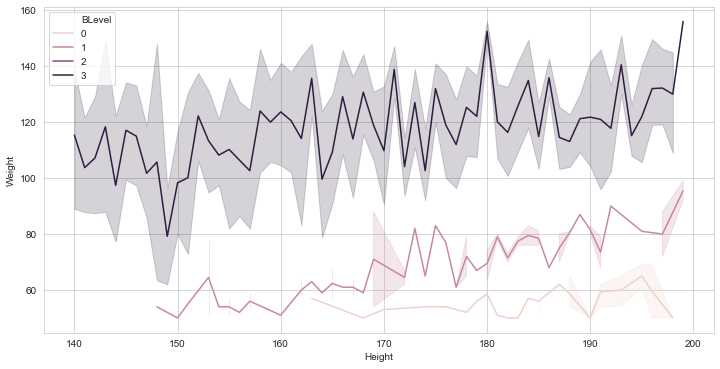

In [4]:
sns.set_style("whitegrid")
df3 = df1
df3['BLevel'] = df3['Level']
df3.BLevel[df3.BLevel<2] = 0
df3.BLevel[df3.BLevel==2] = 1
df3.BLevel[df3.BLevel>2] = 3
plt.figure(figsize=(12,6))
sns.lineplot(x="Height",y="Weight",hue='BLevel',ci=95,data=df3)

# 散点图

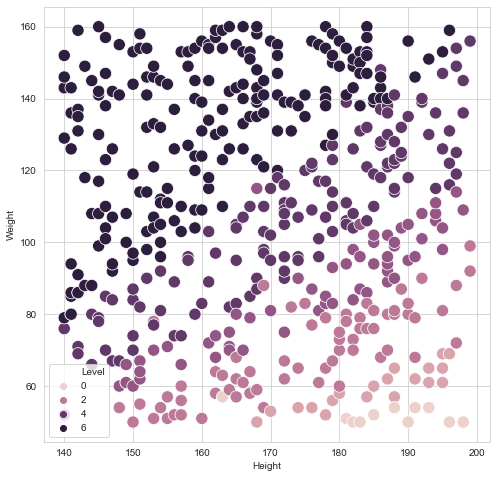

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='Height', y="Weight",s=150,hue="Level",data=df3)

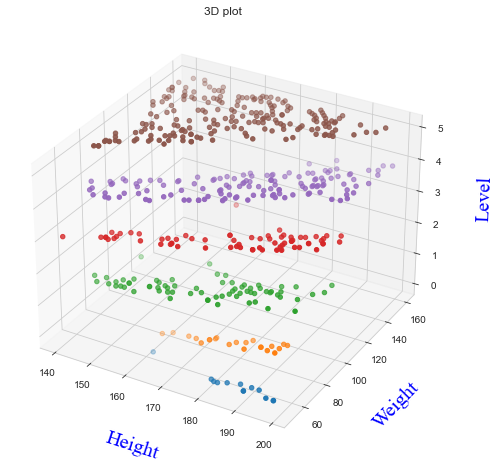

In [6]:
from mpl_toolkits.mplot3d import Axes3D
groups = df3.groupby('Level')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.Level, label=name)

font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20,"color":"blue"}
ax.set_xlabel('Height',font2,labelpad=20)
ax.set_ylabel('Weight',font2,labelpad=20)
ax.set_zlabel('Level',font2,labelpad=20)
ax.set_title('3D plot ')
plt.show()

# 直方图

<AxesSubplot:>

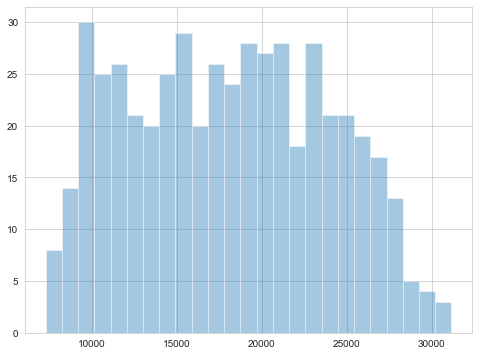

In [7]:
sns.distplot(df3['Height']*df3['Weight'], bins=25,kde=False)

# 数据变换

1. 增加特征项

2. 正则化

In [8]:
Height_scaled = (df1['Height']-df1['Height'].mean())/(df1['Height'].std())  
Weight_scaled = (df1['Weight']-df1['Weight'].mean())/(df1['Weight'].std())  
df2 = pd.DataFrame()
df2['Gender'] = df1['Gender']
df2['Height_scaled'] = Height_scaled
df2['Weight_scaled'] = Weight_scaled
df2['Height'] = df1['Height']
df2['Weight'] = df1['Weight']
df2['Ratio'] = Weight_scaled/Height_scaled
df2['Multi'] = Weight_scaled*Height_scaled
df2['Level'] = df1['Level']

df2.sort_values('Level',ascending=True,inplace=True)
df2 = df2.reset_index(drop=True)
df2.tail(5)

,Gender,Height_scaled,Weight_scaled,Height,Weight,Ratio,Multi,Level
495,Male,-0.67,1.05,159,140,-1.57,-0.70,5
496,Male,-0.67,1.48,159,154,-2.22,-0.99,5
497,Male,-0.67,0.43,159,120,-0.65,-0.29,5
498,Female,-0.55,0.86,161,134,-1.58,-0.47,5
499,Female,-0.79,-0.09,157,103,0.12,0.07,5


# Ratio 正则化前后对比

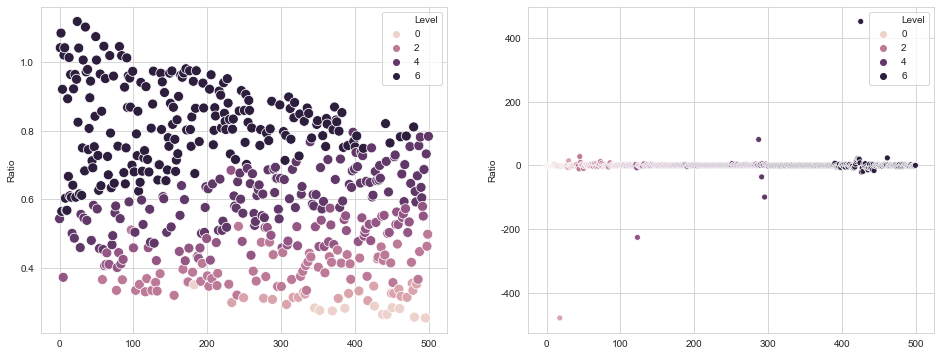

In [9]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax = sns.scatterplot(x=df1.index, y="Ratio",s=100,hue='Level',data=df1,ax=axes[0])
ax = sns.scatterplot(x=df2.index, y="Ratio",hue='Level',data=df2,ax=axes[1])

# Height*Weight 正则化前后对比

<AxesSubplot:>

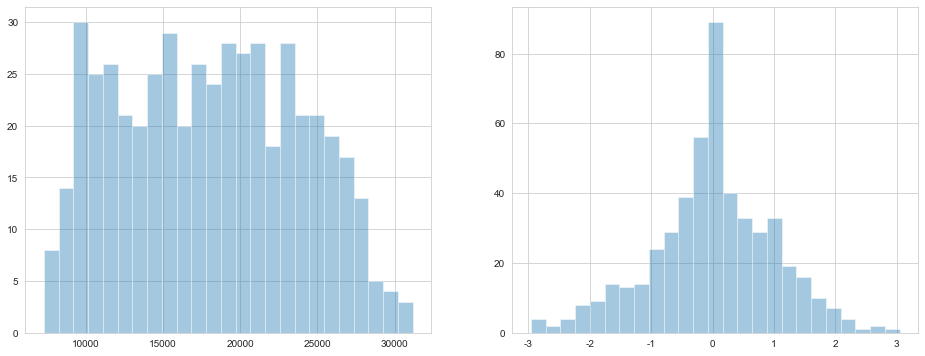

In [10]:
fig,axes=plt.subplots(1,2,figsize=(16,6))

sns.distplot(df2['Height']*df2['Weight'], bins=25,ax=axes[0],kde=False)
sns.distplot(df2['Height_scaled']*df2['Weight_scaled'], bins=25,ax=axes[1],kde=False)

# Weight_scaled 和 Height_scaled 分布

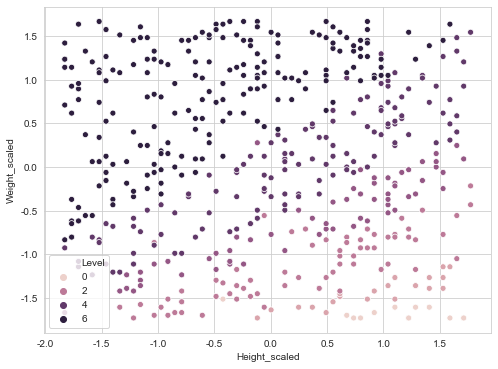

In [11]:
ax = sns.scatterplot(x='Height_scaled', y="Weight_scaled",hue="Level",data=df2)

# Weight_scaled*Height_scaled 分布

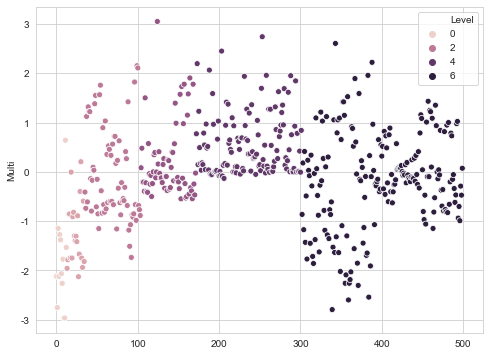

In [12]:
ax = sns.scatterplot(x=df2.index, y="Multi",hue="Level",data=df2)

# Weight_scaled,Height_scaled,Fat 三维分布

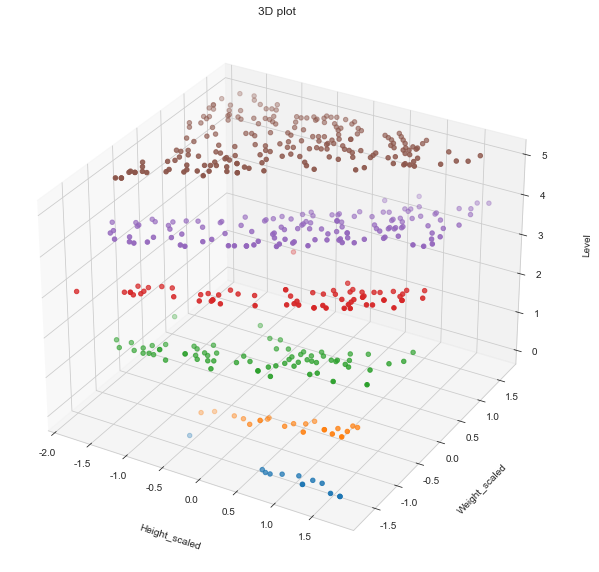

In [13]:
from mpl_toolkits.mplot3d import Axes3D
groups = df2.groupby('Level')
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111, projection='3d')
for name, group in groups:
    ax.scatter(group.Height_scaled, group.Weight_scaled, group.Level, label=name)
ax.set_xlabel('Height_scaled',labelpad=20)
ax.set_ylabel('Weight_scaled',labelpad=20)
ax.set_zlabel('Level',labelpad=20)
ax.set_title('3D plot ')
plt.show()

# 关联系数热力图

,Height,Weight,Level
Height,1.00,0.00,-0.42
Weight,0.00,1.00,0.80
Level,-0.42,0.80,1.00


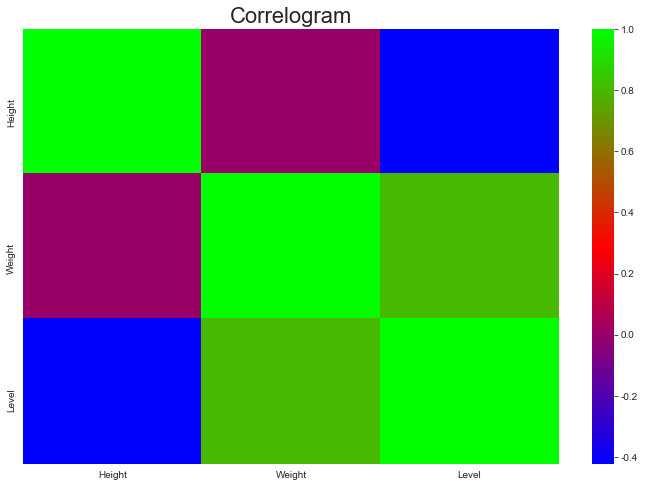

In [14]:
plt.figure(figsize=(12,8))
df4 = df1
del df4['Ratio']
del df4['BLevel']
corr = df4.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='brg', annot=False)
plt.title('Correlogram', fontsize=22)
corr

# Weight_scaled 和 Height_scaled 变化趋势

<AxesSubplot:xlabel='Height_scaled', ylabel='Weight_scaled'>

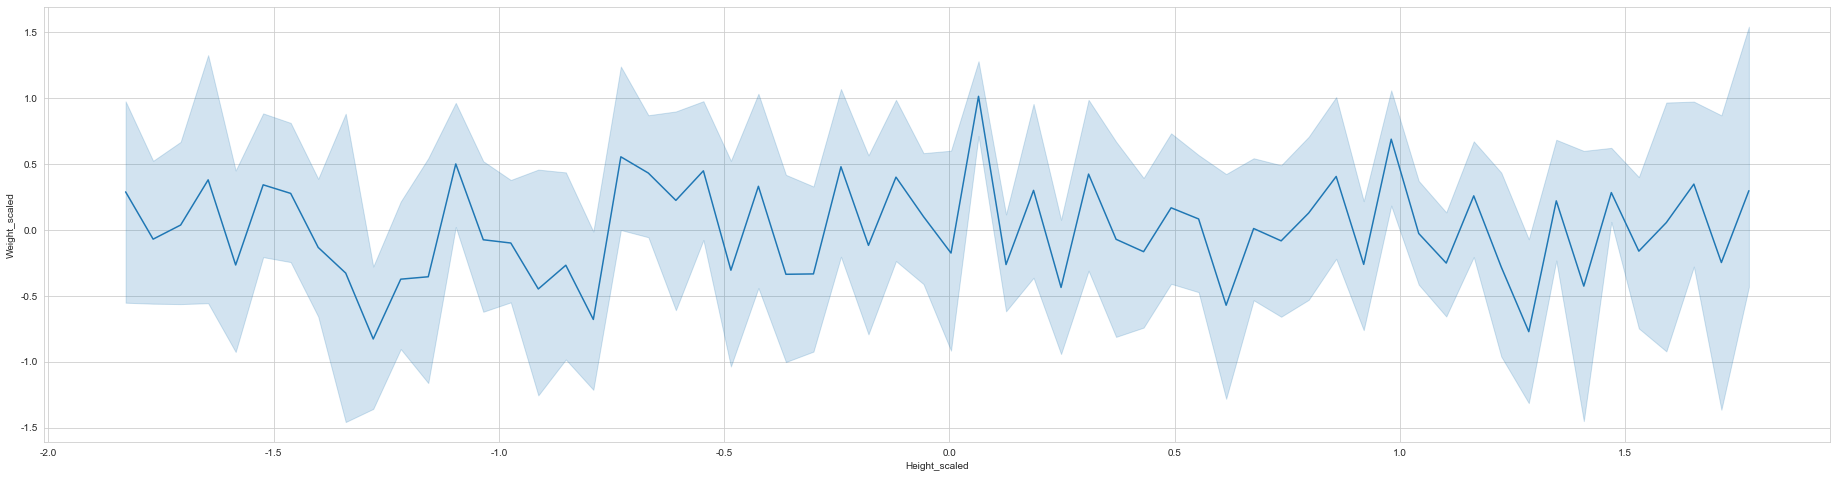

In [15]:
plt.figure(figsize=(32,8))
sns.lineplot(x="Height_scaled",y="Weight_scaled",data=df2)

# 透视表

In [16]:
pt = df2.pivot_table(index="Weight", columns='Height',  values=['Level'],aggfunc=np.mean)
pt = df2.pivot_table(index=['Height'],values=['Level'],aggfunc=['count'])
pt = df2.pivot_table(index=['Level'],values=['Height','Weight'],aggfunc=['mean'])
pt

mean       
      Height Weight
Level              
0     187.54  51.69
1     184.77  59.41
2     174.26  69.09
3     175.99  86.88
4     173.88 107.95
5     160.98 132.89